In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AsheshJain/Bengluru_house_price_prediction_project/main/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df.drop(['availability','society'],axis='columns',inplace=True)

In [7]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [8]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df.shape

(12710, 7)

In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [12]:
df['BHK']=df['size'].apply(lambda x: int(x.split(' ')[0]))
df

,area_type,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df[~df['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [15]:
def convert_tot_sqft_to_num(s):
    numbers=s.split('-')
    if len(numbers)==2:
        return float(float(numbers[0])+float(numbers[1]))/2
    try:
        return float(s)
    except:
        return None

In [16]:
df2=df.copy()

In [17]:
df2['total_sqft']=df['total_sqft'].apply(convert_tot_sqft_to_num)
df2.isnull().sum()

area_type      0
location       0
size           0
total_sqft    42
bath           0
balcony        0
price          0
BHK            0
dtype: int64

In [18]:
df['total_sqft']=df2['total_sqft']
df.shape

(12710, 8)

In [19]:
df.dropna(inplace=True)
df.shape

(12668, 8)

In [20]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [21]:
df['location'].value_counts()

Whitefield                  513
Sarjapur  Road              372
Electronic City             300
Kanakpura Road              259
Thanisandra                 230
                           ... 
poornaprajna layout           1
Bahubali Nagar                1
RMC YARD                      1
Wajid layout thanisandra      1
Koppa                         1
Name: location, Length: 1259, dtype: int64

In [22]:
df['location']=df['location'].apply(lambda x: x.strip())

In [23]:
location=df.groupby('location')['location'].count().sort_values()
location_others=location[location<=10].index.to_list()
location_others

['1 Annasandrapalya',
 'Kengeri Satellite Town ( BDA SITE)',
 'Kengeri Satellite Town KHB Apartment',
 'Kengeri Satellite Town Stage II',
 'Kirloskar layout, Basaveshwarnagar',
 'Kodanda Reddy Layout',
 'Konappana Agrahara',
 'Koppa',
 'Kudlu Village,',
 'Kumbalgodu',
 'Kumbhena Agrahara',
 'Kuvempu Layout',
 'LIC Colony',
 'Lakkasandra',
 'Lakkasandra Extension',
 'Lakshminarayanapura, Electronic City Phase 2',
 'Lakshmipura Vidyaanyapura',
 'Lalbagh Road',
 'Kenchanehalli R R Nagar',
 'Laxminarayana Layout',
 'Keerthi Layout',
 'Karnataka Shabarimala',
 'KAMAKIYA',
 'KG Halli',
 'KHB Colony Extension',
 'KPC Layout',
 'Kadarenahalli',
 'Kalasipalya',
 'Kalhalli',
 'Kalkere Channasandra',
 'Kamdhenu Nagar',
 'Kanakadasa Layout',
 'vinayakanagar',
 'Kanakapura  Rod',
 'Kanakapura Main Road',
 'Kanakapura Road',
 'Kanakapura Road,',
 'Kanakapura main  Road',
 'Kannur',
 'Kathriguppe IV Phase',
 'K R C kothanur',
 'M.G Road',
 'MM Layout',
 'Milk Colony',
 'Millers Road',
 'Mudalpalaya',

In [24]:
df['location']=df['location'].apply(lambda x: 'others' if x in location_others else x)

In [25]:
df['location'].value_counts().count()

236

In [26]:
df

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [27]:
df[df['total_sqft']/df['BHK']<250].index.to_list()

[58,
 68,
 70,
 78,
 89,
 119,
 129,
 170,
 176,
 282,
 315,
 349,
 413,
 482,
 483,
 491,
 513,
 554,
 614,
 679,
 727,
 757,
 770,
 789,
 807,
 833,
 838,
 857,
 860,
 866,
 961,
 976,
 992,
 1010,
 1020,
 1024,
 1062,
 1066,
 1103,
 1105,
 1108,
 1122,
 1141,
 1162,
 1220,
 1233,
 1269,
 1314,
 1364,
 1379,
 1448,
 1481,
 1492,
 1519,
 1567,
 1575,
 1622,
 1624,
 1649,
 1672,
 1685,
 1758,
 1768,
 1769,
 1802,
 1820,
 1825,
 1830,
 1832,
 1863,
 1875,
 1887,
 1937,
 1939,
 1941,
 1979,
 2071,
 2086,
 2153,
 2162,
 2168,
 2177,
 2179,
 2184,
 2322,
 2328,
 2353,
 2380,
 2391,
 2401,
 2449,
 2464,
 2468,
 2487,
 2495,
 2518,
 2552,
 2596,
 2635,
 2654,
 2662,
 2678,
 2758,
 2763,
 2794,
 2803,
 2815,
 2843,
 2857,
 2864,
 2873,
 2900,
 2903,
 2927,
 2929,
 2937,
 2947,
 3002,
 3028,
 3039,
 3054,
 3092,
 3095,
 3097,
 3123,
 3157,
 3191,
 3274,
 3275,
 3297,
 3342,
 3395,
 3437,
 3450,
 3469,
 3506,
 3511,
 3527,
 3536,
 3592,
 3594,
 3622,
 3685,
 3692,
 3732,
 3787,
 3794,
 3805,
 3

In [28]:
df.drop(index=df[df['total_sqft']/df['BHK']<250].index.to_list(),inplace=True)
df.shape

(12139, 9)

In [29]:
df['price_per_sqft'].describe()

count     12139.000000
mean       6247.976225
std        4025.906065
min         267.829813
25%        4200.000000
50%        5271.084337
75%        6874.439629
max      176470.588235
Name: price_per_sqft, dtype: float64

In [30]:
def remove_outliner(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf['price_per_sqft'])
        st=np.mean(subdf['price_per_sqft'])
        reduced_df=subdf[(subdf['price_per_sqft']>(m-st))&(subdf['price_per_sqft']<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [31]:
df=remove_outliner(df)
df.shape

(11718, 9)

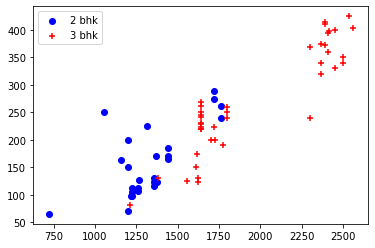

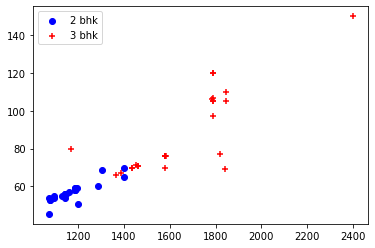

In [32]:
def get_scatter(location):
    B2=df[df['BHK']==2]
    B3=df[df['BHK']==3]
    plt.scatter(B2[B2['location']==location]['total_sqft'],B2[B2['location']==location]['price'],color='blue',label='2 bhk')
    plt.scatter(B3[B3['location']==location]['total_sqft'],B3[B3['location']==location]['price'],color='red',label='3 bhk',marker='+')
    plt.legend()
    plt.show()
    
get_scatter('Rajaji Nagar')
get_scatter('Kothanur')

In [33]:
def remove_outliners_bhk(dff):
    exclude_indices=np.array([])
    for location,location_df in dff.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return dff.drop(index=exclude_indices)
df=remove_outliners_bhk(df)

In [34]:
df.shape

(8348, 9)

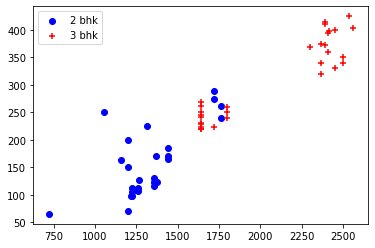

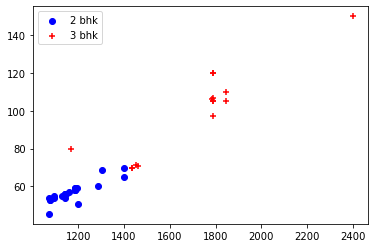

In [35]:
get_scatter('Rajaji Nagar')
get_scatter('Kothanur')

In [36]:
df.drop('size',axis=1,inplace=True)
df

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,Plot Area,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4,18750.000000
4,Super built-up Area,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2,6000.000000
...,...,...,...,...,...,...,...,...
11704,Built-up Area,others,1650.0,1.0,1.0,130.0,2,7878.787879
11710,Carpet Area,others,1200.0,2.0,3.0,70.0,2,5833.333333
11711,Super built-up Area,others,1800.0,1.0,1.0,200.0,1,11111.111111
11714,Super built-up Area,others,1353.0,2.0,2.0,110.0,2,8130.081301


In [37]:
df.bath.value_counts()

2.0     4661
3.0     1997
1.0      683
4.0      638
5.0      214
6.0       99
7.0       26
8.0       17
9.0        9
10.0       2
13.0       1
27.0       1
Name: bath, dtype: int64

In [38]:
df[df.bath>df['BHK']+2]

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
1742,Plot Area,Chamrajpet,1500.0,9.0,3.0,230.0,6,15333.333333
1895,Built-up Area,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6835,Super built-up Area,Rajaji Nagar,7500.0,8.0,3.0,1700.0,5,22666.666667
8045,Super built-up Area,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
9880,Super built-up Area,others,11338.0,9.0,1.0,1000.0,6,8819.897689


In [39]:
df.drop(index=df[df.bath>df['BHK']+2].index.values,inplace=True)

In [40]:
df.shape

(8343, 8)

In [41]:
df.drop('price_per_sqft',axis=1,inplace=True)
df.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Plot Area,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4
4,Super built-up Area,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2


In [42]:
dummies=pd.get_dummies(df[['area_type','location']])
dummies

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_others
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11704,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11710,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11711,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11714,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
df_final=pd.concat([df,dummies],axis=1)
df_final.columns

Index(['area_type', 'location', 'total_sqft', 'bath', 'balcony', 'price',
       'BHK', 'area_type_Built-up  Area', 'area_type_Carpet  Area',
       'area_type_Plot  Area',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_others'],
      dtype='object', length=247)

In [44]:
df_final.drop(['area_type','location','area_type_Built-up  Area','location_others'],axis=1,inplace=True)
df_final

,total_sqft,bath,balcony,price,BHK,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,2.0,450.0,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1000.0,3.0,2.0,60.0,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11704,1650.0,1.0,1.0,130.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11710,1200.0,2.0,3.0,70.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11711,1800.0,1.0,1.0,200.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11714,1353.0,2.0,2.0,110.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X=df_final.drop('price',axis=1)
X
Y=df_final['price']
Y

0        428.0
1        194.0
2        235.0
3        450.0
4         60.0
         ...  
11704    130.0
11710     70.0
11711    200.0
11714    110.0
11715     26.0
Name: price, Length: 8343, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
len(x_train),len(x_test)

(6674, 1669)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [48]:
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.76126988, 0.44204146, 0.50861697, 0.79409579, 0.7391542 ,
       0.77566349, 0.79209188, 0.76385323, 0.76856565, 0.73003412])

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

In [50]:
def find_best_model(X,Y):
    algos={
        'Linear_Regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'Lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'DecisionTree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'Ridge':{
            'model':Ridge(),
            'params':{
                'alpha':[1,2]
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X,Y)

,model,best_score,best_params
0,Linear_Regression,0.649036,{'normalize': False}
1,Lasso,0.563455,"{'alpha': 1, 'selection': 'random'}"
2,DecisionTree,0.712386,"{'criterion': 'mse', 'splitter': 'best'}"
3,Ridge,0.649472,{'alpha': 1}


In [51]:
final_model=DecisionTreeRegressor(criterion='mse', splitter='best')
final_model.fit(X,Y)

DecisionTreeRegressor()

In [52]:
def predict_price(total_sqft,bath,balcony,BHK,area,location):
    if(location=='others'):
        loc_index=0
    else:
        loc_index=np.where(X.columns==('location_'+location))[0][0]
    if(area=='Built-up  Area'):
        area_index=0
    else:
        area_index=np.where(X.columns==('area_type_'+area))[0][0]
    x=np.zeros(len(X.columns))
    x[0]=total_sqft
    x[1]=bath
    x[2]=balcony
    x[3]=BHK
    if area_index>0:
        x[area_index]=1
    if loc_index>0:
        x[loc_index]=1
        
    return final_model.predict([x])[0]

In [53]:
predict_price(1000,2,1,2,'Built-up  Area','Whitefield')

92.5

In [54]:
locations=X.columns.to_list()
locations=locations[7:]
all_locations=[{'label':'others','value':'others'}]
for x in locations:
    all_locations.append({'label':x.split('_')[1],'value':x.split('_')[1]})
all_locations

[{'label': 'others', 'value': 'others'},
 {'label': '1st Block Jayanagar', 'value': '1st Block Jayanagar'},
 {'label': '1st Phase JP Nagar', 'value': '1st Phase JP Nagar'},
 {'label': '2nd Phase Judicial Layout', 'value': '2nd Phase Judicial Layout'},
 {'label': '2nd Stage Nagarbhavi', 'value': '2nd Stage Nagarbhavi'},
 {'label': '5th Phase JP Nagar', 'value': '5th Phase JP Nagar'},
 {'label': '6th Phase JP Nagar', 'value': '6th Phase JP Nagar'},
 {'label': '7th Phase JP Nagar', 'value': '7th Phase JP Nagar'},
 {'label': '8th Phase JP Nagar', 'value': '8th Phase JP Nagar'},
 {'label': '9th Phase JP Nagar', 'value': '9th Phase JP Nagar'},
 {'label': 'AECS Layout', 'value': 'AECS Layout'},
 {'label': 'Abbigere', 'value': 'Abbigere'},
 {'label': 'Akshaya Nagar', 'value': 'Akshaya Nagar'},
 {'label': 'Ambalipura', 'value': 'Ambalipura'},
 {'label': 'Ambedkar Nagar', 'value': 'Ambedkar Nagar'},
 {'label': 'Amruthahalli', 'value': 'Amruthahalli'},
 {'label': 'Anandapura', 'value': 'Anandapur

In [55]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input, Output

In [56]:
app = dash.Dash()
server = app.server

In [ ]:
app.layout = html.Div(style={
'background-image': 'url("https://raw.githubusercontent.com/AsheshJain/Bengluru_house_price_prediction_project/main/360_F_363483524_gI1sdnBhQibreXv07dJDmLhcka9q4Mta.jpg")',
'background-repeat': 'no-repeat',
'background-position': 'right top',
'background-size': 'cover'
},children=[
    html.H1("Bengaluru City House Price Prediction", style={"textAlign": "center",'color':'#800000'}),
    html.Br(),
    html.Div([
        html.H3("Total Area (in Square Feet)",style={"textAlign": "center",'color':'#800000'}),
        dcc.Input(id="tot_area", type="number", placeholder="Enter area here",style={
            'margin-left': '43%',
            'height': '2rem',
            'width': '12rem'}),
        html.H3("Number of Bathrooms",style={"textAlign": "center",'color':'#800000'}),
        dcc.Input(id="bath", type="number", placeholder="Enter number of bedrooms",style={
            'margin-left': '43%',
            'height': '2rem',
            'width': '12rem'}),
        html.H3("Number of Balconys",style={"textAlign": "center",'color':'#800000'}),
        dcc.Input(id="balcony", type="number", placeholder="Enter number of balcony",style={
            'margin-left': '43%',
            'height': '2rem',
            'width': '12rem'}),
        html.H3("How much BHK",style={"textAlign": "center",'color':'#800000'}),
        dcc.Input(id="bhk", type="number", placeholder="Enter BHK's number",style={
            'margin-left': '43%',
            'height': '2rem',
            'width': '12rem'}),
        html.H3("Type of Area",style={"textAlign": "center",'color':'#800000'}),
        dcc.Dropdown(id='area_typ',
            options=[
                {'label': 'Carpet Area', 'value': 'Carpet  Area'},
                {'label': 'Built-Up Area', 'value': 'Built-up  Area'},
                {'label': 'Super Built-Up Area', 'value': 'Super built-up  Area'},
                {'label': 'Plot Area', 'value': 'Plot  Area'}
            ],
            placeholder="Select Type of Area",style={'width':'13rem','margin-left': '37%'}
        ),  
        html.H3("Location",style={"textAlign": "center",'color':'#800000'}),
        dcc.Dropdown(id='location',
            options=all_locations,
            placeholder="Select location",style={'width':'13rem','margin-left': '37%'}
        ),
        html.Button('Predict', id='predict', n_clicks=0,style={    'margin-left': '44%',
    'margin-top': '2%',
    'height': '2rem',
    'width': '10rem',
    'color': 'white',
    'background': '#800000',
    'font-weight': 'bold',
     'cursor': 'grab',
    'font-size': '20px'}),
    ]),
    html.Br(),
    html.Div(id='output',style={"textAlign": "center",'color':'#800000','font-size': '30px','background':'#FFA500'}),
])

@app.callback(
    Output('output','children'),
    Input("tot_area", "value"),
    Input("bath", "value"),
    Input("balcony", "value"),
    Input("bhk", "value"),
    Input("area_typ", "value"),
    Input("location", "value"),
    Input('predict','n_clicks')
)
def show_prediction(tot_area,bath,balcony,bhk,area_typ,location,n_clicks):
    if(n_clicks==1):
        predicted=predict_price(tot_area,bath,balcony,bhk,area_typ,location)
        return "The Price Predicted is {} Lakhs".format(predicted)


if __name__=='__main__':
	app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
